## Hidden Markov Model
In this section of our project we are trying to estimate the number of animal of a certain specie basing ourselves on observations of this specie. We are specifically focusing on deer but if the method reveals to be efficient, we can generalize our results to any specie.

It is important to note that by looking at counts from different years, we found that there are more data points as years go on. We have theorized that this may be due to scientists using the gbif website to record more as they may have found this site to be more useful, and also due to the fact that it has become much more easier in the past ten years to record data that it was in the nineties.

In [330]:
%matplotlib inline

# Imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.misc import *
from scipy.sparse import *
import itertools

In [110]:
# http://www.gbif.org/occurrence/search?TAXON_KEY=359&YEAR=2014#
# This is data for all Mammals in 2014 across the whole planet
mammals = pandas.read_csv('Data/Mammalia_US_to2015.csv', sep='\t', usecols=['year','species'], nrows=500000)


In [111]:
mammals.head()

,species,year
0,Procyon lotor,2014
1,Zalophus californianus,2014
2,Vulpes vulpes,2014
3,Odocoileus hemionus,2014
4,Lepus californicus,2014


In [112]:
deer=pd.read_csv('Data/Deer_2015.csv', sep='\t')
deer.columns.values

array(['gbifid', 'datasetkey', 'occurrenceid', 'kingdom', 'phylum',
       'class', 'order', 'family', 'genus', 'species',
       'infraspecificepithet', 'taxonrank', 'scientificname',
       'countrycode', 'locality', 'publishingorgkey', 'decimallatitude',
       'decimallongitude', 'coordinateuncertaintyinmeters',
       'coordinateprecision', 'elevation', 'elevationaccuracy', 'depth',
       'depthaccuracy', 'eventdate', 'day', 'month', 'year', 'taxonkey',
       'specieskey', 'basisofrecord', 'institutioncode', 'collectioncode',
       'catalognumber', 'recordnumber', 'identifiedby', 'rights',
       'rightsholder', 'recordedby', 'typestatus', 'establishmentmeans',
       'lastinterpreted', 'mediatype', 'issue'], dtype=object)

In [114]:
# Create a subset data frame that just contains the columns that we need
occurences_mammals = mammals['year'].value_counts()
occurences = deer[deer.year>=1991]
occurences_deer=occurences['year'].value_counts()


In [151]:
print occurences_deer

2015    1285
2014     985
2013     786
2012     543
2003     337
2011     289
1999     264
2009     251
2010     237
1995     227
1998     217
1991     198
2007     173
1992     168
2006     167
2004     121
1994     119
1996     104
2002      98
2001      87
2008      84
2000      71
1993      70
1997      61
2005      54
dtype: int64


In [371]:
deer_obs=[198.,168.,70.,119.,227.,104.,61.,217.,264.,71.,87.,98.,337.,121.,54.,167.,173.,84.,251.,237.,289.,543.,786.,\
          985.]
mammal_obs=[22860,31016,28991,39349,30735, 34717,23672,27646,24332,21773,22675,26147,21637,19916,16340,14304,12546,\
           9315,11546,9900,11715,9025,10838,11399]

# What percentages are the deer observations out of all mammals
percentage=np.divide(deer_obs,mammal_obs)*100
percentage


array([ 0.86614173,  0.54165592,  0.24145424,  0.30242192,  0.73857166,
        0.29956505,  0.25768841,  0.78492368,  1.08499096,  0.32609195,
        0.38368247,  0.37480399,  1.55751722,  0.60755172,  0.33047736,
        1.16750559,  1.37892555,  0.90177134,  2.17391304,  2.39393939,
        2.46692275,  6.0166205 ,  7.25226056,  8.64110887])

As the number of deer observations increases in the past few years (since 2005, although the actual number of deer is decreasing) we normalize the data counts using the average number of mammals observation over the years.
Indeed, we assume the number of observed mammal should be the same over the years and use that ratio (average observation of mammals divided by observations on that year) as a factor to normalize the observations of deer.

In [370]:
# Normalize by the relative number of observations
average_norm=np.divide(float(np.sum(mammal_obs))/len(mammal_obs),mammal_obs)
average_norm

array([ 0.89748104,  0.66147848,  0.70768227,  0.52139614,  0.66752616,
        0.59096168,  0.86669553,  0.74211158,  0.84318661,  0.94228708,
        0.90480338,  0.78465662,  0.94820986,  1.03014745,  1.25559466,
        1.43431325,  1.63529545,  2.20251387,  1.77692852,  2.07236532,
        1.75129464,  2.27328717,  1.89300763,  1.79984355])

In [264]:
# Deer represent approximately in percentages 1.7121 % of the mammals observations
norm_obs=np.multiply(average_norm,deer_obs)
norm_obs

array([  177.70124672,   111.12838535,    49.53775884,    62.04614052,
         151.52843935,    61.46001479,    52.86842754,   161.03821228,
         222.60126582,    66.90238292,    78.71789416,    76.89634885,
         319.54672167,   124.64784177,    67.80211138,   239.53031203,
         282.90611217,   185.01116479,   446.00905797,   491.15058081,
         506.12414995,  1234.39493075,  1487.9039952 ,  1772.84590023])

In [265]:
years=np.linspace(1991,2014,24)
years

array([ 1991.,  1992.,  1993.,  1994.,  1995.,  1996.,  1997.,  1998.,
        1999.,  2000.,  2001.,  2002.,  2003.,  2004.,  2005.,  2006.,
        2007.,  2008.,  2009.,  2010.,  2011.,  2012.,  2013.,  2014.])

In [266]:
## Actual estimated deer number US: http://www.deerfriendly.com/decline-of-deer-populations

In [219]:
# In Millions
actual_deer=[35.5, 35.75, 36., 36.2, 36.5, 36.8, 37.1, 37.4, 37.7, 38.1, 37.85, 37.5, 37.1, 36.8, 36.4, 36.1, 35.75,\
             35.4, 35., 34.6, 34.2, 33.8, 33.5, 33.2]
act_deer=np.multiply(actual_deer,10**6)

In [337]:
ratio=np.divide(norm_obs,actual_deer)  
# This has to be divided by 10^6 but for simplicity purposes, I will keep it this way
print ratio
discretized_r=np.linspace(1,55,19)

discrete_ratio=np.zeros(len(actual_deer))
for i in range(len(ratio)):
    for j in range(len(discretized_r)-1):
        if ratio[i]>discretized_r[j] and ratio[i]<discretized_r[j]+0.5:
            discrete_ratio[i]=discretized_r[j]
        elif ratio[i]<discretized_r[j+1] and ratio[i]>=discretized_r[j]+0.5:
            discrete_ratio[i]=discretized_r[j+1]
        elif ratio[i]==discretized_r[j]:
            discrete_ratio[i]=discretized_r[j]
discrete_ratio
obs_len=len(np.unique(discrete_ratio))
obs_states=(np.unique(discrete_ratio))
obs_states

[  5.00566892   3.1084863    1.37604886   1.71398178   4.15146409
   1.6701091    1.425025     4.30583455   5.90454286   1.75596806
   2.079733     2.0505693    8.61311918   3.38716961   1.86269537
   6.6351887    7.91345768   5.22630409  12.74311594  14.19510349
  14.79895175  36.52056008  44.41504463  53.3989729 ]


array([  1.,   4.,   7.,  10.,  13.,  16.,  37.,  46.,  55.])

In [278]:
# For discretization
discrete_states=np.linspace(30,40,41)

discrete=np.zeros(len(actual_deer))
for i in range(len(actual_deer)):
    for j in range(len(discrete_states)-1):
        if actual_deer[i]>discrete_states[j] and actual_deer[i]<discrete_states[j+1]:
            discrete[i]=discrete_states[j+1]
        elif actual_deer[i]==discrete_states[j]:
            discrete[i]=discrete_states[j]
    

In [279]:
## Deer number actual California (up to 2013 only) http://www.deerfriendly.com/deer/california

In [280]:
cali_estimated=[850000,800000,700000,670000,690000,580000,580000,580000,550000,500000,500000,680000,550000,500000,\
                     600000,405000,420000,500000,500000,490000,460000,480000,480000]

In [281]:
# Create a Dataframe with all the data
data_dict={"years": years, "Mammals_obs":mammal_obs, "Deer_obs":deer_obs, "Percentage_deer":percentage, \
           "Comparison_average":average_norm, "Actual_deer (Mi)": actual_deer, "Discretized_actual": discrete, \
          "Normalized_obs":norm_obs, "Ratio":ratio, "Discrete Ratio": discrete_ratio}
Data_summary=pd.DataFrame(data_dict)

Data_summary

,Actual_deer (Mi),Comparison_average,Deer_obs,Discrete Ratio,Discretized_actual,Mammals_obs,Normalized_obs,Percentage_deer,Ratio,years
0,35.50,0.897481,198,7,35.50,22860,177.701247,0.866142,5.005669,1991
1,35.75,0.661478,168,4,35.75,31016,111.128385,0.541656,3.108486,1992
2,36.00,0.707682,70,1,36.00,28991,49.537759,0.241454,1.376049,1993
3,36.20,0.521396,119,4,36.25,39349,62.046141,0.302422,1.713982,1994
4,36.50,0.667526,227,4,36.50,30735,151.528439,0.738572,4.151464,1995
5,36.80,0.590962,104,4,37.00,34717,61.460015,0.299565,1.670109,1996
6,37.10,0.866696,61,1,37.25,23672,52.868428,0.257688,1.425025,1997
7,37.40,0.742112,217,4,37.50,27646,161.038212,0.784924,4.305835,1998
8,37.70,0.843187,264,7,37.75,24332,222.601266,1.084991,5.904543,1999
9,38.10,0.942287,71,4,38.25,21773,66.902383,0.326092,1.755968,2000


### Transition Matrix
We calculate the transition matrix by counting the occurences of going from hidden state i to hidden state j, and dividing the values of each row by the sum of the row: we check that the obtained probabilities on each row sum up to 1. 

In [76]:
# TRY:
# One row (transition matrix: decrease or increase)

In [340]:
# For the transition matrix, we create a 41 by 41 matrix and calculate the probability of a certain current letter
# knowing the previous letter. The rows of this matrix should sum up to 1 
# The columns correspond to the current letter and the rows to the previous letter

#Emission is probability from hidden to observed

#Transition is from hidden to next hidden
n=len(discrete_states)
transition=np.zeros((n,n))
# Add a pseudocount
transition=transition+0.05

for j in xrange(len(discrete)-1):
    for i in xrange(len(discrete_states)):
        if discrete[j+1]==discrete_states[i]:
            for k in xrange(len(discrete_states)):
                if discrete[j]==discrete_states[k]:
                    transition[k,i]+=1

In [341]:
SUMS=np.zeros(n)
for i in xrange(len(SUMS)):
    SUMS[i]=np.sum(transition[i,:])
    

In [342]:
transition_f=np.zeros((n,n))
for i in xrange(len(SUMS)):
    transition_f[i,:]=transition[i,:]/SUMS[i]

In [343]:
# Check to verify my calculations, the sum of the rows should be zero
SUM2=np.zeros(n)
for i in xrange(len(SUM2)):
    SUM2[i]=np.sum(transition_f[i,:])
SUM2

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [344]:
# Emission probability
emission=np.zeros((n,obs_len))
# Add a pseudocount
emission=emission+0.05
for j in xrange(len(discrete)-1):
    for i in xrange(obs_len):
        if discrete_ratio[j]==obs_states[i]:
            for k in xrange(len(discrete_states)):
                if discrete[j]==discrete_states[k]:
                    emission[k,i]+=1

In [352]:
SUMS=np.zeros(n)
for i in xrange(len(SUMS)):
    SUMS[i]=np.sum(emission[i,:])

In [349]:
emission_f=np.zeros((n,obs_len))
for i in xrange(len(SUMS)):
    emission_f[i,:]=emission[i,:]/SUMS[i]

In [353]:
# Check to verify my calculations, the sum of the rows should be zero
SUM2=np.zeros(n)
for i in xrange(len(SUM2)):
    SUM2[i]=np.sum(emission_f[i,:])
SUM2

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.])

In [354]:
emission_log=np.log(emission_f)
transition_log=np.log(transition_f)

### Starting Probability

In [355]:
## Starting Probability
itemindex= np.where(discrete_states==discrete[0])[0][0]
print itemindex
discrete_states[6]

starting_prob=np.zeros(n)
starting_prob[itemindex]=1

22


In [356]:
discrete_ratio

array([  7.,   4.,   1.,   4.,   4.,   4.,   1.,   4.,   7.,   4.,   4.,
         4.,  10.,   4.,   4.,   7.,  10.,   7.,  13.,  16.,  16.,  37.,
        46.,  55.])

In [358]:
# The function takes as input the observed and hiddent states. 
# It takes the starting probability, the transition and emission matrix and the test data Y.

# The function returns Z, which corresponds to the array of the indexes of the corrected letter (which we can 
# extract later from the state space)

def viterbi(hidden, observed, starting_prob, Y, transition_log, emission_log):   
    size_test=len(Y)
    T1=np.zeros((len(hidden),size_test))
    T2=np.zeros((len(hidden),size_test))
    index= np.where(observed==Y[0])[0][0]
    for i in xrange(len(hidden)):
        T1[i,1]=np.log(starting_prob[i])+emission_log[i,index]
    for i in range(1,len(Y)):
        index= np.where(observed==Y[i])[0][0]
        for j in xrange(len(hidden)):
            list_val=T1[:,i-1]+transition_log[:,j]+emission_log[j,index]
            T1[j,i]=np.max(list_val) 
            T2[j,i]=np.argmax(list_val) 
    Z=np.zeros(size_test)  
    T_ind=size_test-1
    Z[T_ind]=np.argmax(T1[:,T_ind])
    
    for i in range(T_ind, 1, -1):
        Z[i-1]=T2[Z[i], i]
    
    return Z
    

In [361]:
Z=viterbi(discrete_states,obs_states, starting_prob, discrete_ratio, transition_log, emission_log)
Z

array([  0.,  30.,  29.,  28.,  26.,  28.,  29.,  30.,  31.,  33.,  32.,
        30.,  29.,  28.,  26.,  25.,  23.,  22.,  20.,  19.,  17.,  16.,
        14.,  13.])

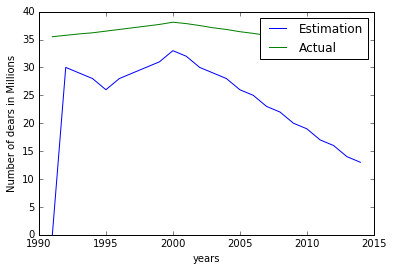

In [369]:
figsize=(20,20)
plt.plot(years,Z,label="Estimation")
plt.plot(years,actual_deer,label="Actual")
plt.legend()
plt.xlabel("years")
plt.ylabel("Number of dears in Millions")

We can see that even though the number of observations of deer increase since 2005, Viterbi algorithm manages to translate the decrease that occured in the actual values since 2000.

Note: To explain the increase in number of deer counts, there could also be an increase in the number of deer studies. This raises the question as to whether this is reliable data. Sightings may also depend on where the scientists decided to look for these animals, as it is unlikely there are people sweeping the entirety of the US to look for deer. Much of the data probably depends on scientific study patterns and may not reflect actual deer population.

In [ ]:
# Repeat what I did in the HW as well with one more degree

## Kalman Filter

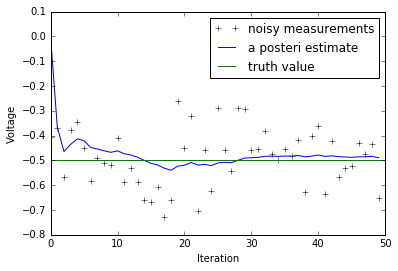

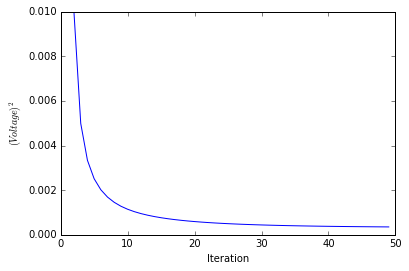

In [332]:
# Kalman filter 

import numpy
import pylab
n_iter=50

# intial parameters
sz=50
x = -.5 # truth value
z = numpy.random.normal(x,0.1,size=sz) # observations (normal about x, sigma=0.1)

Q = 1e-5 # process variance

# allocate space for arrays
xhat=numpy.zeros(sz)      # a posteri estimate of x
P=numpy.zeros(sz)         # a posteri error estimate
xhatminus=numpy.zeros(sz) # a priori estimate of x
Pminus=numpy.zeros(sz)    # a priori error estimate
K=numpy.zeros(sz)         # gain or blending factor

R = 0.1**2 # estimate of measurement variance, change to see effect

# intial guesses
xhat[0] = 0.0
P[0] = 1.0

for k in range(1,sz):
    # time update
    xhatminus[k] = xhat[k-1]
    Pminus[k] = P[k-1]+Q

    # measurement update
    K[k] = Pminus[k]/( Pminus[k]+R )
    xhat[k] = xhatminus[k]+K[k]*(z[k]-xhatminus[k])
    P[k] = (1-K[k])*Pminus[k]

pylab.figure()
pylab.plot(z,'k+',label='noisy measurements')
pylab.plot(xhat,'b-',label='a posteri estimate')
pylab.axhline(x,color='g',label='truth value')
pylab.legend()
pylab.xlabel('Iteration')
pylab.ylabel('Voltage')

pylab.figure()
valid_iter = range(1,n_iter) # Pminus not valid at step 0
pylab.plot(valid_iter,Pminus[valid_iter],label='a priori error estimate')
pylab.xlabel('Iteration')
pylab.ylabel('$(Voltage)^2$')
pylab.setp(pylab.gca(),'ylim',[0,.01])
pylab.show()

In [ ]:
## Compare later with built in function

In [ ]:
from pykalman import KalmanFilter

kf = KalmanFilter(transition_matrices = [[1, 1], [0, 1]], observation_matrices = [[0.1, 0.5], [-0.3, 0.0]])
measurements = np.asarray([[1,0], [0,0], [0,1]])  # 3 observations
kf = kf.em(measurements, n_iter=5)
(filtered_state_means, filtered_state_covariances) = kf.filter(measurements)
(smoothed_state_means, smoothed_state_covariances) = kf.smooth(measurements)

In [ ]:
from numpy import *

def kf_predict(X, P, A, Q, B, U):
    X = np.dot(A, X) + np.dot(B, U)
    P = np.dot(A, dot(P, A.T)) + Q
    return(X,P)
 
def kf_update(X, P, Y, H, R):
    IM=dot(H, X)
    IS=R + dot(H, dot(P, H.T))
    K=dot(P, dot(H.T, inv(IS)))
    X=X + dot(K, (Y-IM))
    P=P-dot(K, dot(IS, K.T))
    LH=gauss_pdf(Y, IM, IS)
    return (X,P,K,IM,IS,LH)
    
def gauss_pdf(X, M, S):
    if M.shape()[1] == 1:
        DX=X - tile(M, X.shape()[1])
        E=0.5 * sum(DX * (dot(inv(S), DX)), axis=0)
        E=E + 0.5 * M.shape()[0] * log(2 * pi) + 0.5 * log(det(S))
        P=exp(-E)
    elif X.shape()[1] == 1:
        DX=tile(X, M.shape()[1])- M
        E=0.5 * sum(DX * (dot(inv(S), DX)), axis=0)
        E=E + 0.5 * M.shape()[0] * log(2 * pi) + 0.5 * log(det(S))
        P=exp(-E)
    else:
        DX=X-M
        E=0.5 * dot(DX.T, dot(inv(S), DX))
        E=E + 0.5 * M.shape()[0] * log(2 * pi) + 0.5 * log(det(S))
        P=exp(-E)
        
    return (P[0],E[0]) 

In [ ]:
from numpy.linalg import *
#time step of mobile movement
dt = 0.1
# Initialization of state matrices
X = array([[0.0], [0.0], [0.1], [0.1]])
P = diag((0.01, 0.01, 0.01, 0.01))
A = array([[1, 0, dt , 0], [0, 1, 0, dt], [0, 0, 1, 0], [0, 0, 0,\
 1]])
Q = eye(X.shape()[0])
B = eye(X.shape()[0])
U = zeros((X.shape()[0],1)) 
 
    
# Measurement matrices
Y = array([[X[0,0] + abs(randn(1)[0])], [X[1,0] +\
 abs(randn(1)[0])]])
H = array([[1, 0, 0, 0], [0, 1, 0, 0]])
R = eye(Y.shape()[0])
# Number of iterations in Kalman Filter
N_iter = 50
# Applying the Kalman Filter
for i in arange(0, N_iter):
 (X, P) = kf_predict(X, P, A, Q, B, U)
 (X, P, K, IM, IS, LH) = kf_update(X, P, Y, H, R)
 Y = array([[X[0,0] + abs(0.1 * randn(1)[0])],[X[1, 0] +\
 abs(0.1 * randn(1)[0])]])